In [1]:
import pandas as pd
import numpy as np
import tempfile
import tensorflow as tf
import pandas as pd

In [9]:
sample_gen_pickle = pd.read_pickle('../generalization_data/sample_gen_processed_processed_6108.pkl')
sample_gen_pickle = sample_gen_pickle.reset_index(drop=True)
sample_gen_pickle


,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
0,2c9207157f8e60cd017f960e491b6f43,8a69c468826ee9b401828badfc6c3158,0,41.0,6,5,1,"[0.11442535037227546, 0.0534682035829645, -0.1...",3,0,...,720.0,360.0,"[0.01410938306399229, -0.0013842289481747908, ...",1,"[0.16147995305672858, -0.07191881877515002, -0...",1,"[0.4002958143776276, -0.18420725834968477, -0....",19.0,1122.000000,0
1,2c9207158059e82b018093a6e4cb418b,2c92071580dd3ab70180f18714e119c0,0,33.0,3,5,0,"[0.4501867000452721, -0.2863792718427415, 0.24...",5,0,...,210.0,360.0,"[0.1833094661547266, 0.5715641770033284, -0.00...",30,"[0.42336579128110136, 0.4415293631473783, 0.08...",1,"[0.2136262495353285, 0.6889780980076565, -0.03...",8.0,718.800000,0
2,8a69c40a8256f56001825ca41faf64ef,8a69f68e82198e9101821a368c682309,1,33.0,5,5,1,"[0.11775671151124475, -0.011553286324814227, 0...",2,0,...,480.0,360.0,"[0.1242462692048715, 0.059776515919823886, 0.0...",1,"[0.13464711322627812, 0.03601774564762096, 0.0...",1,"[0.0846159262961945, 0.14089215219884776, -0.0...",9.0,704.714286,1
3,8a69c40a8256f56001826286256928f3,8a69c47b82590db9018266992c3969ee,0,22.0,3,3,1,"[0.16766031367661063, 0.08010325682707635, -0....",4,1,...,180.0,108.0,"[0.040317751879249734, -0.004257781078691267, ...",10,"[0.2017619187252856, -0.1156944482993234, 0.12...",1,"[0.10444744556880664, -0.03406922047311521, -0...",1.0,46.000000,1
4,8a69c40a8256f56001826286256928f3,8a69c4a8820f0ee001821446eaaf33e6,1,22.0,3,3,1,"[0.1651847923619087, 0.08347563503643975, -0.0...",3,1,...,120.0,108.0,"[0.040317751879249734, -0.004257781078691267, ...",40,"[0.19550223541803413, -0.1128925577464503, 0.1...",1,"[0.11715741531242865, -0.03963572163058257, -0...",1.0,46.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,8a69f60582c8626e0182c9fc367050e6,8a69c4df82b081d30182c391c1f51bfc,1,31.0,3,3,1,"[0.2567986184645047, 0.1773098969033448, -0.05...",4,0,...,360.0,360.0,"[0.09276561511018605, -0.009011915759238062, 0...",1,"[0.3645132923299154, -0.22668855509127542, 0.0...",1,"[0.2028996048643067, -0.07039791359665602, -0....",11.0,1268.000000,1
6104,8a69f60582c8626e0182cedb7ca86dc8,8a69c47b82b07fdc0182b3dcd51b7a71,1,36.0,3,3,1,"[0.25056830107660755, 0.1855862403422956, -0.0...",3,0,...,180.0,120.0,"[0.22000723570438951, -0.03295513889781696, 0....",5,"[0.1900283816382599, -0.101841367221085, 0.037...",1,"[0.2731820444500037, -0.09003645686019562, -0....",14.0,1583.333333,0
6105,8a69f61382b080760182c37a984f3a9a,2c92071580dd3ab70180f18714e119c0,0,27.0,5,5,1,"[0.4501867000452721, -0.2863792718427415, 0.24...",5,0,...,210.0,300.0,"[0.153610738681069, 0.7683157290699305, -0.012...",30,"[0.42336579128110136, 0.4415293631473783, 0.08...",1,"[0.2136262495353285, 0.6889780980076565, -0.03...",5.0,487.000000,1
6106,8a69f64782e59cc90182f37791dc6649,8a69d77e82926b410182b011869b3b74,1,43.0,6,5,1,"[0.0023119905200976844, 0.0012746774424303585,...",1,1,...,390.0,900.0,"[0.06146393099923767, -0.005610505861232773, 0...",1,"[0.002297610145839555, -0.0017582815189133496,...",1,"[0.05431574129285235, -0.0031620523933319758, ...",16.0,968.666667,0


In [10]:
cvjd_202208_6108 = pd.read_pickle('../generalization_data/cvjd_202208_6108.pkl')
cvjd_202208_6108_filter = cvjd_202208_6108[~((cvjd_202208_6108['da_label']==-1)&(cvjd_202208_6108['rank_label']==1))]

sample_gen_pickle_filter = cvjd_202208_6108_filter[['cv_id', 'jd_id']].join(sample_gen_pickle.set_index(['cv_id', 'jd_id']), on=['cv_id', 'jd_id'], how='inner')
sample_gen_pickle_filter


,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
470,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648,1,29.0,6,6,1,"[0.09277498223886475, -0.03952262146219975, 0....",3,0,...,450.0,300.0,"[0.07039364324025871, 0.2880829109022901, 0.02...",10,"[0.18441332600901494, 0.06588908681415924, 0.0...",1,"[0.02873254597276924, 0.048931096005174084, 0....",4.0,563.000000,1
471,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0,1,26.0,5,3,1,"[0.1023999348750124, 0.04751552184958714, 0.02...",3,0,...,117.0,360.0,"[0.011100235606147804, 7.939893480271763e-06, ...",1,"[0.271541039849995, -0.05849604259176054, 0.11...",1,"[0.10846853628687826, 0.05116647405298525, -0....",3.0,1035.000000,1
472,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919,1,37.0,5,5,1,"[0.05918397056812913, -0.031240114117823837, -...",2,0,...,130.0,360.0,"[0.060740105737797444, -0.005443975234769693, ...",1,"[0.16044120155854188, -0.05668003205311443, 0....",1,"[0.06651289573756076, 0.014997406147045417, -0...",14.0,1004.600000,0
473,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4,0,32.0,5,5,1,"[0.25193474353158885, -0.04554422412911068, -0...",1,0,...,600.0,360.0,"[0.8288737721013716, -0.08232114537384592, -0....",1,"[0.32750011024547615, -0.09309227487991212, -0...",1,"[0.31002010541277025, -0.0897530905147125, 0.2...",8.0,730.666667,0
475,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0,0,28.0,5,5,1,"[0.4501867000452721, -0.2863792718427415, 0.24...",6,0,...,210.0,360.0,"[0.1652421969718723, 0.8070962044928331, -0.00...",30,"[0.42336579128110136, 0.4415293631473783, 0.08...",1,"[0.2136262495353285, 0.6889780980076565, -0.03...",6.0,608.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82315,8a69d71b829f59ae0182a7129c4b5148,8a69c468826ee9b4018285b0eae10542,0,32.0,3,3,1,"[0.19333314256757306, -0.0815831051729063, 0.1...",0,0,...,180.0,360.0,"[0.13616596198637468, -0.028523967984007415, -...",1,"[0.21492116858970264, 0.11930633393895711, 0.0...",1,"[0.1160873393575219, 0.15324282743069048, 0.03...",8.0,876.600000,0
82316,8a69d71b82add4e10182aebff7d016d2,8a69c468826ee9b4018290a64a0c01bb,1,48.0,6,5,1,"[0.29384696475326105, 0.1803168796297615, -0.0...",4,0,...,390.0,650.0,"[0.03801878591820939, 0.002055526300859245, 0....",1,"[0.2968250287691325, -0.14856524773646151, 0.1...",1,"[0.29934539591116216, -0.09569835493803901, -0...",25.0,2199.250000,0
82325,8a69d7b4826d7dfb01826d7efad200f1,2c920715818a462a01818e3f9c0a2337,1,28.0,6,5,1,"[0.26510545923451473, -0.1609137166948379, 0.1...",1,0,...,600.0,360.0,"[0.01579678573620715, 0.02754614758041266, 0.0...",10,"[0.3526755183052799, 0.2155730415147982, -0.04...",0,"[0.0330008517681321, 0.0630411380976238, 0.003...",5.0,345.000000,1
82330,8a69d7c282199453018247bb00cb68a3,8a69c468826ee9b40182831bedfc5e79,1,39.0,6,5,1,"[0.33288651428694255, 0.16593632049911952, -0....",2,0,...,1200.0,360.0,"[0.021858445582752378, -0.0029680340848054574,...",1,"[0.34863086013900424, -0.18327544622226305, 0....",1,"[0.05021500274618119, 0.002934676595860777, -0...",13.0,1179.500000,1


In [2]:
flags = tf.app.flags
FLAGS = flags.FLAGS
tf.app.flags.DEFINE_string('f','','kernel')

flags.DEFINE_string("model_dir", "../modelV0915", "Base directory for output models.") #模型输出路径
flags.DEFINE_integer("train_steps", 100, "Number of training steps.") 


In [3]:
COLUMNS = ['age', 'recruit_number', 'workYear', 'min_annual_salary', 'max_annual_salary', 
            'degree_index_cv', 'degree_index_jd', 'gender_index_cv', 'job_intentstatus_cv',
            'description_tfidf_pca', 'position_tfidf_pca', 'requirement_tfidf_pca', 'kills_tfidf_pca', 'title_category_tags_tfidf_pca',
            'work_duration_mean', 'equal_job', 'parsed_desiredSalary', 'school_intersect_cvjd', 'location_intersect_cvjd',
            'degree_match_cvjd', 'workyear_match_cvjd', 'keyU']

LABEL_COLUMN = "model_label"

# 离散特征
CATEGORICAL_COLUMNS = ['degree_index_cv', 'degree_index_jd', 'gender_index_cv', 'job_intentstatus_cv', 'school_intersect_cvjd',
                        'location_intersect_cvjd', 'degree_match_cvjd', 'workyear_match_cvjd', 'keyU']

# 文本向量特征
ARRAY_COLUMNS = ['description_tfidf_pca', 'position_tfidf_pca', 'requirement_tfidf_pca', 'kills_tfidf_pca', 'title_category_tags_tfidf_pca']

# 连续特征
CONTINUOUS_COLUMNS = ['age', 'recruit_number', 'workYear', 'min_annual_salary', 'max_annual_salary', 
                    'work_duration_mean', 'equal_job', 'parsed_desiredSalary', ]


In [4]:
model_dir = tempfile.mkdtemp() if not '../modelV0915' else '../modelV0915'
print("model dir = %s" % model_dir)

model dir = ../modelV0915


In [5]:
def col2arr(data,col):
    slist = []
    for i in tuple(data.index):
        slist.append(np.array(data.loc[i,col]))
    return np.array(slist)

def input_fn(df):
    continuous_cols = {k: tf.constant(df[k].values) for k in CONTINUOUS_COLUMNS}
    array_cols = {k: tf.constant(col2arr(df,k)) for k in ARRAY_COLUMNS}
    categorical_cols = {k: tf.SparseTensor(indices=[[i,0] for i in range( df[k].size)], values = df[k].values, dense_shape=[df[k].size,1]) for k in CATEGORICAL_COLUMNS}
    
    feature_cols = dict(continuous_cols)
    feature_cols.update(categorical_cols)
    feature_cols.update(array_cols)
    
    label = tf.constant(df[LABEL_COLUMN].values)

    return feature_cols, label

In [6]:
# 将类别特征变成onehot，default_value需要注意
degree_index_cv = tf.feature_column.categorical_column_with_identity('degree_index_cv', num_buckets=8, default_value=0)
degree_index_jd = tf.feature_column.categorical_column_with_identity('degree_index_jd', num_buckets=8, default_value=0)
gender_index_cv = tf.feature_column.categorical_column_with_identity('gender_index_cv', num_buckets=3, default_value=0)
job_intentstatus_cv = tf.feature_column.categorical_column_with_identity('job_intentstatus_cv', num_buckets=4, default_value=0)
school_intersect_cvjd = tf.feature_column.categorical_column_with_identity('school_intersect_cvjd', num_buckets=2, default_value=0)
location_intersect_cvjd = tf.feature_column.categorical_column_with_identity('location_intersect_cvjd', num_buckets=2, default_value=0)
degree_match_cvjd = tf.feature_column.categorical_column_with_identity('degree_match_cvjd', num_buckets=2, default_value=0)
workyear_match_cvjd = tf.feature_column.categorical_column_with_identity('workyear_match_cvjd', num_buckets=2, default_value=0)
keyU = tf.feature_column.categorical_column_with_identity('keyU', num_buckets=2, default_value=0)

# 多维数值特征输入
description_tfidf_pca = tf.feature_column.numeric_column(key="description_tfidf_pca",shape=70)
position_tfidf_pca = tf.feature_column.numeric_column(key="position_tfidf_pca",shape=40)
requirement_tfidf_pca = tf.feature_column.numeric_column(key="requirement_tfidf_pca",shape=70)
kills_tfidf_pca = tf.feature_column.numeric_column(key="kills_tfidf_pca",shape=30)
title_category_tags_tfidf_pca = tf.feature_column.numeric_column(key="title_category_tags_tfidf_pca",shape=30)

# 一维数值特征，还没归一化
age = tf.feature_column.numeric_column("age", default_value=0.0)
recruit_number = tf.feature_column.numeric_column("recruit_number", default_value=0.0)
workYear = tf.feature_column.numeric_column("workYear", default_value=0.0)
min_annual_salary = tf.feature_column.numeric_column("min_annual_salary", default_value=0.0)
max_annual_salary = tf.feature_column.numeric_column("max_annual_salary", default_value=0.0)
work_duration_mean = tf.feature_column.numeric_column("work_duration_mean", default_value=0.0)
equal_job = tf.feature_column.numeric_column("equal_job", default_value=0.0)
parsed_desiredSalary = tf.feature_column.numeric_column("parsed_desiredSalary", default_value=0.0)

# 连续特征分桶onehot
# 连续特征离散化后只会出现在wide侧。
# 思考下：1.哪些特征可以放入wide侧 2.桶的范围
age_buckets = tf.feature_column.bucketized_column(age, boundaries= [18, 25, 30, 35, 40, 45])
recruit_number_buckets = tf.feature_column.bucketized_column(recruit_number, boundaries= [5, 10, 15])
workYear_buckets = tf.feature_column.bucketized_column(workYear, boundaries= [3, 5, 10, 15, 20])
work_duration_mean_buckets = tf.feature_column.bucketized_column(work_duration_mean, boundaries= [365, 547, 730, 1095, 1460])
equal_job_buckets = tf.feature_column.bucketized_column(equal_job, boundaries= [3, 5, 7, 10])
# 还有3个salary特征没有处理


In [7]:
# 类别特征onehot
# 连续数值特征分桶离散化
# 交叉特征
wide_columns = [
                degree_index_cv, degree_index_jd, gender_index_cv, job_intentstatus_cv, 
                school_intersect_cvjd, location_intersect_cvjd, degree_match_cvjd, workyear_match_cvjd, keyU,
                age_buckets, recruit_number_buckets, workYear_buckets, work_duration_mean_buckets, equal_job_buckets,
                tf.feature_column.crossed_column([degree_index_cv, degree_index_jd], hash_bucket_size=int(1e2)),
                tf.feature_column.crossed_column([degree_index_cv, workYear_buckets], hash_bucket_size=int(1e2)),
                tf.feature_column.crossed_column([degree_index_cv, gender_index_cv, age_buckets], hash_bucket_size=int(1e2)),
                tf.feature_column.crossed_column([school_intersect_cvjd, degree_match_cvjd, workyear_match_cvjd, keyU], hash_bucket_size=int(1e2)),
                ]

# 文本向量特征
# 类别特征onehot之后接入embedding层
# 连续的数值特征没有接入
deep_columns = [
                description_tfidf_pca, position_tfidf_pca, requirement_tfidf_pca, kills_tfidf_pca, title_category_tags_tfidf_pca,
                tf.feature_column.embedding_column(degree_index_cv, 8),
                tf.feature_column.embedding_column(degree_index_jd, 8),
                tf.feature_column.embedding_column(gender_index_cv, 8),
                tf.feature_column.embedding_column(school_intersect_cvjd, 8),
                tf.feature_column.embedding_column(location_intersect_cvjd, 8),
                tf.feature_column.embedding_column(degree_match_cvjd, 8),
                tf.feature_column.embedding_column(workyear_match_cvjd, 8),
                tf.feature_column.embedding_column(keyU, 8),
                ]

In [8]:
est_config = tf.estimator.RunConfig(
    save_checkpoints_steps = 50,    # Save checkpoints every this many steps. 
    keep_checkpoint_max = 0,       # If None or 0, all checkpoint files are kept. 
)


m = tf.estimator.DNNLinearCombinedClassifier(model_dir=model_dir, 
                                            linear_feature_columns=wide_columns, 
                                            dnn_feature_columns = deep_columns, 
                                            dnn_hidden_units=[200, 100, 30, 10],
                                            config=est_config)

INFO:tensorflow:Using config: {'_model_dir': '../modelV0915', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 50, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb8d03f8b00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
sample_gen_pickle_filter[:3]

,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
470,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648,1,29.0,6,6,1,"[0.09277498223886475, -0.03952262146219975, 0....",3,0,...,450.0,300.0,"[0.07039364324025871, 0.2880829109022901, 0.02...",10,"[0.18441332600901494, 0.06588908681415924, 0.0...",1,"[0.02873254597276924, 0.048931096005174084, 0....",4.0,563.0,1
471,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0,1,26.0,5,3,1,"[0.1023999348750124, 0.04751552184958714, 0.02...",3,0,...,117.0,360.0,"[0.011100235606147804, 7.939893480271763e-06, ...",1,"[0.271541039849995, -0.05849604259176054, 0.11...",1,"[0.10846853628687826, 0.05116647405298525, -0....",3.0,1035.0,1
472,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919,1,37.0,5,5,1,"[0.05918397056812913, -0.031240114117823837, -...",2,0,...,130.0,360.0,"[0.060740105737797444, -0.005443975234769693, ...",1,"[0.16044120155854188, -0.05668003205311443, 0....",1,"[0.06651289573756076, 0.014997406147045417, -0...",14.0,1004.6,0


In [18]:
results = m.evaluate(input_fn=lambda: input_fn(sample_gen_pickle_filter[:500]), steps=1, checkpoint_path = '../modelV0915/model.ckpt-1000')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-16T17:41:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2022-09-16-17:42:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.688, accuracy_baseline = 0.66, auc = 0.70044565, auc_precision_recall = 0.8021245, average_loss = 0.60840213, global_step = 1000, label/mean = 0.66, loss = 304.20108, precision = 0.77018636, prediction/mean = 0.58468175, recall = 0.75151515
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: ../modelV0915/model.ckpt-1000


In [24]:
p = m.predict(input_fn=lambda: input_fn(sample_gen_pickle_filter[:500]), checkpoint_path = '../modelV0915/model.ckpt-1000')

count = 0
pred = []
for i in p:
    if count == len(sample_gen_pickle_filter[:500]):
        break
    # i是一个字典
    #print(i)
    pred.append(i['probabilities'])
    count += 1

pred_label = pd.DataFrame(pred)
pred_label

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,0,1
0,0.631451,0.368549
1,0.205021,0.794979
2,0.488557,0.511443
3,0.874801,0.125199
4,0.812259,0.187741
...,...,...
495,0.799235,0.200765
496,0.927508,0.072493
497,0.871649,0.128351
498,0.153579,0.846421


In [25]:

real_label = sample_gen_pickle_filter[['model_label'] + ['cv_id', 'jd_id']]
real_label = real_label.reset_index(drop=True)
real_label[:500]

,model_label,cv_id,jd_id
0,1,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648
1,1,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0
2,1,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919
3,0,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4
4,0,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0
...,...,...,...
495,0,8a69f60582c8626e0182c9c29be6083d,8a69f67f82198d89018233fa9b975421
496,0,8a69f60582c8626e0182cb18b72e0333,8a69c4d6826e586401827c180d2b333e
497,0,8a69f60582c8626e0182cde79be660e9,8a69f67f82198d890182340f5d966a9d
498,1,8a69f64782e59cc90182f286a04c4e63,8a69f601823a92b00182479b68127b4d


In [44]:
pred_real_label = pd.concat([pred_label[[0,1]], real_label[:500]], axis=1)
pred_real_label

,0,1,model_label,cv_id,jd_id
0,0.631451,0.368549,1,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648
1,0.205021,0.794979,1,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0
2,0.488557,0.511443,1,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919
3,0.874801,0.125199,0,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4
4,0.812259,0.187741,0,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0
...,...,...,...,...,...
495,0.799235,0.200765,0,8a69f60582c8626e0182c9c29be6083d,8a69f67f82198d89018233fa9b975421
496,0.927508,0.072493,0,8a69f60582c8626e0182cb18b72e0333,8a69c4d6826e586401827c180d2b333e
497,0.871649,0.128351,0,8a69f60582c8626e0182cde79be660e9,8a69f67f82198d890182340f5d966a9d
498,0.153579,0.846421,1,8a69f64782e59cc90182f286a04c4e63,8a69f601823a92b00182479b68127b4d


0.7002


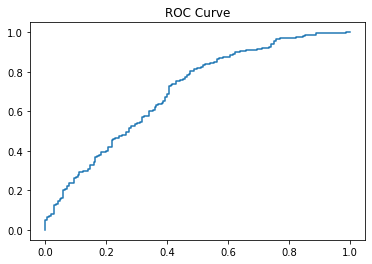

In [26]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plot
from sklearn.metrics import auc

y = np.array(real_label[:500]['model_label'])
scores = np.array(pred_label[1])

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = round(auc(fpr, tpr), 4)
print(AUC)
plot.figure("ROC Curve")
plot.title("ROC Curve")
plot.xlabel = ('FPR')
plot.ylabel = ('TPR')
plot.plot(fpr, tpr, label='ROC')
plot.show()

In [29]:
# -*- coding:utf-8 -*-
import json

with open("../generalization_data/result.json", 'r') as f:
    temp = json.loads(f.read())
    res_list = temp['scored_cv_jd_pairs']
    cv_id_list = []
    jd_id_list = []
    score_list = []
    for item in res_list:
        cv_id = item['cv_id']
        jd_id = item['jd_id']
        score = item['score']
        
        cv_id_list.append(cv_id)
        jd_id_list.append(jd_id)
        score_list.append(score)

    


In [38]:
online_modle_res = pd.DataFrame({'cv_id': cv_id_list, 'jd_id': jd_id_list, 'score': score_list})
online_modle_res = online_modle_res.dropna(axis=0, how='any')
online_modle_res

,cv_id,jd_id,score
0,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648,0.627768
1,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0,0.407756
2,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919,0.013149
3,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4,0.346679
4,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0,0.097963
...,...,...,...
495,8a69f60582c8626e0182c9c29be6083d,8a69f67f82198d89018233fa9b975421,0.237074
496,8a69f60582c8626e0182cb18b72e0333,8a69c4d6826e586401827c180d2b333e,0.008283
497,8a69f60582c8626e0182cde79be660e9,8a69f67f82198d890182340f5d966a9d,0.383471
498,8a69f64782e59cc90182f286a04c4e63,8a69f601823a92b00182479b68127b4d,0.323922


In [41]:
# 将online_modle_res拼接上泛化集的真实label
df = sample_gen_pickle_filter[['cv_id', 'jd_id', 'model_label']].join(online_modle_res.set_index(['cv_id', 'jd_id']), on=['cv_id', 'jd_id'], how='inner')
df



,cv_id,jd_id,model_label,score
470,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648,1,0.627768
471,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0,1,0.407756
472,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919,1,0.013149
473,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4,0,0.346679
475,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0,0,0.097963
...,...,...,...,...
8191,8a69f60582c8626e0182c9c29be6083d,8a69f67f82198d89018233fa9b975421,0,0.237074
8192,8a69f60582c8626e0182cb18b72e0333,8a69c4d6826e586401827c180d2b333e,0,0.008283
8193,8a69f60582c8626e0182cde79be660e9,8a69f67f82198d890182340f5d966a9d,0,0.383471
8194,8a69f64782e59cc90182f286a04c4e63,8a69f601823a92b00182479b68127b4d,1,0.323922


0.5028


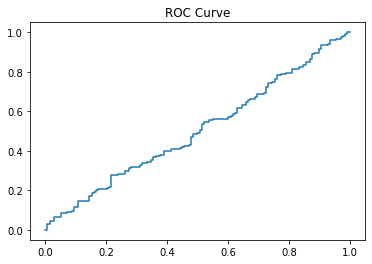

In [42]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plot
from sklearn.metrics import auc

y = np.array(df['model_label'])
scores = np.array(df['score'])

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = round(auc(fpr, tpr), 4)
print(AUC)
plot.figure("ROC Curve")
plot.title("ROC Curve")
plot.xlabel = ('FPR')
plot.ylabel = ('TPR')
plot.plot(fpr, tpr, label='ROC')
plot.show()

In [46]:
pred_real_label.columns

Index([0, 1, 'model_label', 'cv_id', 'jd_id'], dtype='object')

In [48]:
pred_real_label_all = pred_real_label[[0, 1, 'cv_id', 'jd_id']].join(df.set_index(['cv_id', 'jd_id']), on=['cv_id', 'jd_id'], how='inner')
pred_real_label_all

,0,1,cv_id,jd_id,model_label,score
0,0.631451,0.368549,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648,1,0.627768
1,0.205021,0.794979,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0,1,0.407756
2,0.488557,0.511443,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919,1,0.013149
3,0.874801,0.125199,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4,0,0.346679
4,0.812259,0.187741,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0,0,0.097963
...,...,...,...,...,...,...
495,0.799235,0.200765,8a69f60582c8626e0182c9c29be6083d,8a69f67f82198d89018233fa9b975421,0,0.237074
496,0.927508,0.072493,8a69f60582c8626e0182cb18b72e0333,8a69c4d6826e586401827c180d2b333e,0,0.008283
497,0.871649,0.128351,8a69f60582c8626e0182cde79be660e9,8a69f67f82198d890182340f5d966a9d,0,0.383471
498,0.153579,0.846421,8a69f64782e59cc90182f286a04c4e63,8a69f601823a92b00182479b68127b4d,1,0.323922


0.5028


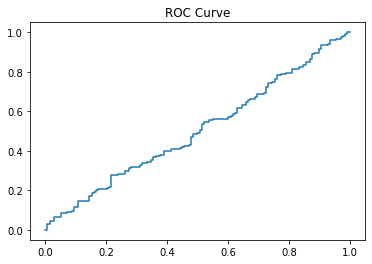

In [49]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plot
from sklearn.metrics import auc

y = np.array(pred_real_label_all['model_label'])
scores = np.array(pred_real_label_all['score'])

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = round(auc(fpr, tpr), 4)
print(AUC)
plot.figure("ROC Curve")
plot.title("ROC Curve")
plot.xlabel = ('FPR')
plot.ylabel = ('TPR')
plot.plot(fpr, tpr, label='ROC')
plot.show()

0.7058


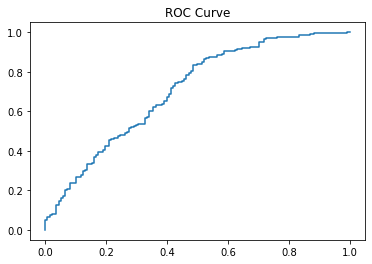

In [50]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plot
from sklearn.metrics import auc

y = np.array(pred_real_label_all['model_label'])
scores = np.array(pred_real_label_all[1])

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = round(auc(fpr, tpr), 4)
print(AUC)
plot.figure("ROC Curve")
plot.title("ROC Curve")
plot.xlabel = ('FPR')
plot.ylabel = ('TPR')
plot.plot(fpr, tpr, label='ROC')
plot.show()